### You will learn:
1. Data Transformation
    1. Data types investigations
    2. Categorical Variable Handling
        - Nominal Data
        - Ordinal Data
        - Interval Data
    3. Normalization
    4. Standarization
    5. Discretization
2. Feature Engineering
    1. Feature Selection 
    2. Feature Extraction and Reduction
3. Sampling
    1. Random Sampling
    2. Stratified Sampling


##### What is the importance of data preprocessing?
1. Explanatory Data Analysis
2. Preparing Data for Modeling

#### Working with datatypes

In [8]:
# import pandas and numpy
import pandas as pd
import numpy as np
# read sales dataset
sales = pd.read_csv('data/sales_data_types.csv')
# check 
sales.head()

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00","$162,500.00",30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$1,012,000.00",10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000.00","$62,500.00",25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00","$490,000.00",4.00%,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000.00","$12,750.00",-15.00%,Closed,2,2,2014,N


In [2]:
# Now, let's check the data types
sales.info()
# 2016 and 2017 columns are in string form which is totally not suitable for any arithmatic operation!
# and lets see!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  5 non-null      float64
 1   Customer Name    5 non-null      object 
 2   2016             5 non-null      object 
 3   2017             5 non-null      object 
 4   Percent Growth   5 non-null      object 
 5   Jan Units        5 non-null      object 
 6   Month            5 non-null      int64  
 7   Day              5 non-null      int64  
 8   Year             5 non-null      int64  
 9   Active           5 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 528.0+ bytes


In [3]:
# add up 2016 and 2017 to a new column 
sales['2016 & 2017'] = sales['2016'] + sales['2017']
# check again
sales.head()
# as you see, the newly created column is totolly not readable that's all because of datatype issues
# Let's fix it
# first, we need to remove the $ sign and the , in 2016 and 2017 column 
# then, we will transform them to numeric datatype

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,2016 & 2017
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y,"$125,000.00$162500.00"
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y,"$920,000.00$101,2000.00"
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y,"$50,000.00$62500.00"
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y,"$350,000.00$490000.00"
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N,"$15,000.00$12750.00"


In [4]:
# remove the $ sign
sales['2016'] = sales['2016'].str.replace('$','')
sales['2017'] = sales['2017'].str.replace('$','')
# remove the ,
sales['2016'] = sales['2016'].str.replace(',','')
sales['2017'] = sales['2017'].str.replace(',','')
# check 
sales.head()

<ipython-input-4-62233b230028>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sales['2016'] = sales['2016'].str.replace('$','')
<ipython-input-4-62233b230028>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sales['2017'] = sales['2017'].str.replace('$','')


,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,2016 & 2017
0,10002.0,Quest Industries,125000.00,162500.00,30.00%,500,1,10,2015,Y,"$125,000.00$162500.00"
1,552278.0,Smith Plumbing,920000.00,1012000.00,10.00%,700,6,15,2014,Y,"$920,000.00$101,2000.00"
2,23477.0,ACME Industrial,50000.00,62500.00,25.00%,125,3,29,2016,Y,"$50,000.00$62500.00"
3,24900.0,Brekke LTD,350000.00,490000.00,4.00%,75,10,27,2015,Y,"$350,000.00$490000.00"
4,651029.0,Harbor Co,15000.00,12750.00,-15.00%,Closed,2,2,2014,N,"$15,000.00$12750.00"


In [5]:
# convert 2016 and 2017 columns
sales['2016'] = sales['2016'].astype(float)
sales['2017'] = sales['2017'].astype(float)
# check datatypes
sales.info()
# convertted successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  5 non-null      float64
 1   Customer Name    5 non-null      object 
 2   2016             5 non-null      float64
 3   2017             5 non-null      float64
 4   Percent Growth   5 non-null      object 
 5   Jan Units        5 non-null      object 
 6   Month            5 non-null      int64  
 7   Day              5 non-null      int64  
 8   Year             5 non-null      int64  
 9   Active           5 non-null      object 
 10  2016 & 2017      5 non-null      object 
dtypes: float64(3), int64(3), object(5)
memory usage: 568.0+ bytes


In [6]:
# Let's try adding them up
sales['2016 and 2017'] = sales['2016'] + sales['2017']
# check
sales.head()

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,2016 & 2017,2016 and 2017
0,10002.0,Quest Industries,125000.0,162500.0,30.00%,500,1,10,2015,Y,"$125,000.00$162500.00",287500.0
1,552278.0,Smith Plumbing,920000.0,1012000.0,10.00%,700,6,15,2014,Y,"$920,000.00$101,2000.00",1932000.0
2,23477.0,ACME Industrial,50000.0,62500.0,25.00%,125,3,29,2016,Y,"$50,000.00$62500.00",112500.0
3,24900.0,Brekke LTD,350000.0,490000.0,4.00%,75,10,27,2015,Y,"$350,000.00$490000.00",840000.0
4,651029.0,Harbor Co,15000.0,12750.0,-15.00%,Closed,2,2,2014,N,"$15,000.00$12750.00",27750.0


#### Missing values handling

In [5]:

import pandas  as pd # import volunteer dataset
volunteer = pd.read_excel('data/volunteer.xlsx')
# print the head
volunteer.head(10)
# you can easily see the word NaN which means that there is no value in that cell
# but how many NaN value we have?

,opportunity_id,content_id,vol_requests,event_time,hits,summary,is_priority,category_id,category_desc,amsl,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,737,Building on successful events last summer and ...,NaN,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,NaN,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,NaN,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5022,37237,500,0,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,Strengthening Communities,NaN,...,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5055,37425,15,0,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,NaN,...,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5056,37426,15,0,135,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,NaN,...,February 12 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5053,37406,2,0,156,The Jewish Museum seeks a volunteer staff deve...,NaN,1.0,Strengthening Communities,NaN,...,January 27 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5085,37652,20,0,4407,"Provide legal advice, information and resource...",y,2.0,Helping Neighbors in Need,NaN,...,February 07 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5091,37730,100,0,325,Join the Cents Ability volunteer corps to teac...,NaN,NaN,NaN,NaN,...,February 08 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5093,37741,1,0,928,Community Health Advocates (CHA);formerly NYC ...,NaN,5.0,Health,NaN,...,February 09 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# info() :: method ---> provide a distrbution for the null values
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   hits                665 non-null    int64  
 5   summary             665 non-null    object 
 6   is_priority         62 non-null     object 
 7   category_id         617 non-null    float64
 8   category_desc       617 non-null    object 
 9   amsl                0 non-null      float64
 10  amsl_unit           0 non-null      float64
 11  org_title           665 non-null    object 
 12  org_content_id      665 non-null    int64  
 13  addresses_count     665 non-null    int64  
 14  locality            595 non-null    object 
 15  region              665 non-null    object 
 16  postalco

In [7]:
# another way 
volunteer.isnull().sum()

opportunity_id          0
content_id              0
vol_requests            0
event_time              0
hits                    0
summary                 0
is_priority           603
category_id            48
category_desc          48
amsl                  665
amsl_unit             665
org_title               0
org_content_id          0
addresses_count         0
locality               70
region                  0
postalcode              6
primary_loc           665
display_url             0
recurrence_type         0
hours                   0
created_date            0
last_modified_date      0
start_date_date         0
end_date_date           0
status                  0
Latitude              665
Longitude             665
Community Board       665
Community Council     665
Census Tract          665
BIN                   665
BBL                   665
NTA                   665
dtype: int64

In [8]:
# Let's now remove every column that has more than 3 missing values
volunteer.dropna(axis=1, thresh=3, inplace=True) # axis = 1 --> to work on columns
                                                 # thresh = 3 --> to keep only columns with at least 3 non-NA values.
                                                 # inplace = True --> commit these changes to the original dataframe
# check with info
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   hits                665 non-null    int64  
 5   summary             665 non-null    object 
 6   is_priority         62 non-null     object 
 7   category_id         617 non-null    float64
 8   category_desc       617 non-null    object 
 9   org_title           665 non-null    object 
 10  org_content_id      665 non-null    int64  
 11  addresses_count     665 non-null    int64  
 12  locality            595 non-null    object 
 13  region              665 non-null    object 
 14  postalcode          659 non-null    float64
 15  display_url         665 non-null    object 
 16  recurren

In [ ]:
# Subset the volunteer dataset that contain all notnull values of category_desc
volunteer_subset = volunteer[volunteer['category_desc'].notnull()]

# Print out the shape of the subset
volunteer_subset.shape

In [1]:
import pandas as pd

# Sometimes the missing values take different shapes like the following example
pima = pd.read_csv('data/pima_indians.csv')
# check the head 
pima.describe()
# you will notice that each of 'Glucose', 'BloodPressure', 'SkinThickness' and 'Insulin'
# has minimum value of zero! which is so weird !
# may be the data entry person was entring any missing value as 0 and this sounds more closer to human sense

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# Now we will try to replace zeros in these columns by np.nan which means Not a Number
# before this we will take a copy of the dataframe
pima_copy = pima.copy()
# Now, lets replace all zeros with np.nan except for Outcome column
pima_copy = pima_copy.loc[:, ~pima_copy.columns.isin(['Outcome','Pregnancies'])]
pima_copy.replace(0, np.nan, inplace= True)
# add the Outcome column from the original dataset
pima_copy['Outcome'] = pima['Outcome']
pima_copy['Pregnancies'] = pima['Pregnancies']
# take a copy of the NaN implaced DataFrame
pima_copy_2 = pima_copy.copy()

In [15]:
# check with info
pima_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   763 non-null    float64
 1   BloodPressure             733 non-null    float64
 2   SkinThickness             541 non-null    float64
 3   Insulin                   394 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
 8   Pregnancies               768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [3]:
# pima.isna().sum()

In [16]:
pima_copy.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Pregnancies                   0
dtype: int64

In [17]:
# Now we will use 
# fillna() : method --> used for filling missing variables
pima_1_no_nan = pima_copy.fillna(5) #We can use this form to fill all the NaN values with a specific value
pima_1_no_nan.isnull().sum()
# No missing values now
# but filling all missing with a fixed value isn't suitable at all
# Let's try filling the NaN with the mean value of each column

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies                 0
dtype: int64

In [18]:
# have a fast look on the output of df.mean()
pima_copy.mean()

Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Pregnancies                   3.845052
dtype: float64

In [19]:
# fill with mean 
pima_2_no_nan = pima_copy.fillna(pima_copy.mean())
# check the number of NaNs
pima_2_no_nan.isnull().sum()

#you can use
# .min()
# .max()
# .median()
# .mode()
# in the same way

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies                 0
dtype: int64

In [21]:
pima_1_no_nan.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies
0,148.0,72.0,35.0,5.0,33.6,0.627,50,1,6
1,85.0,66.0,29.0,5.0,26.6,0.351,31,0,1
2,183.0,64.0,5.0,5.0,23.3,0.672,32,1,8
3,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


In [23]:
pima_2_no_nan.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,6
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,1
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,8
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,1
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0


Filling the messing values may also require a filling strategie that is different from filling with a specific value.
Sometimes we need filling according to a specific pattern

In [24]:
# checkout this dataset and think about missing values
uber = pd.read_csv('data/uber.csv')
# check the data
uber.head(9)

,Date,Hour,Requests,Completes,Supply Hours,Time On Trip,pETA,aETA
0,9/1/2018,11,79,55,42.63,20.43,5.51,7.19
1,NaN,12,73,41,36.43,15.53,5.48,8.48
2,NaN,13,54,50,23.02,17.76,5.07,8.94
3,9/2/2018,11,193,170,64.20,31.47,5.31,6.55
4,NaN,12,258,210,80.28,38.68,4.94,6.08
5,NaN,13,153,107,59.18,23.37,5.14,6.42
6,9/3/2018,11,124,34,30.67,19.65,6.70,8.19
7,NaN,12,78,34,27.02,14.38,6.36,8.01
8,NaN,13,36,15,20.82,12.62,7.82,9.05


In [25]:
# in the above example every 3 rows have the same date but different hours but the data entering process was not 
# repeating the date three times
# fillna() method has a very important argument 
# method --> for specifying the way of filling the missing data and can take the following values
# ffill --> forward fill, fill the holes with the first valid value
# bfill --> backward fill, fill the holes with last valid record
uber.fillna(method='ffill', inplace= True)
uber.head(10)

,Date,Hour,Requests,Completes,Supply Hours,Time On Trip,pETA,aETA
0,9/1/2018,11,79,55,42.63,20.43,5.51,7.19
1,9/1/2018,12,73,41,36.43,15.53,5.48,8.48
2,9/1/2018,13,54,50,23.02,17.76,5.07,8.94
3,9/2/2018,11,193,170,64.20,31.47,5.31,6.55
4,9/2/2018,12,258,210,80.28,38.68,4.94,6.08
5,9/2/2018,13,153,107,59.18,23.37,5.14,6.42
6,9/3/2018,11,124,34,30.67,19.65,6.70,8.19
7,9/3/2018,12,78,34,27.02,14.38,6.36,8.01
8,9/3/2018,13,36,15,20.82,12.62,7.82,9.05
9,9/4/2018,11,98,43,29.17,16.55,6.99,8.32


#### Categorical Variables Handling

##### Dummies and OneHotEncoder

In [26]:
# create a sample data dict
sample_data = { 'Temp': ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
                'Color': ['Red', 'Yellow', 'Blue', 'Blue', 'Red', 'Yellow', 'Red', 'Yellow', 'Yellow', 'Yellow'],
                'Target' : [1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
              }
# create a DataFrame
sample_data_df = pd.DataFrame(sample_data)
sample_data_df_copy = sample_data_df.copy()
# check 
sample_data_df

,Temp,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,1
8,Hot,Yellow,1
9,Cold,Yellow,0


In [27]:
sample_data_df_copy = pd.get_dummies(sample_data_df_copy, prefix=['Color'], columns=['Color'])
sample_data_df_copy

,Temp,Target,Color_Blue,Color_Red,Color_Yellow
0,Hot,1,0,1,0
1,Cold,1,0,0,1
2,Very Hot,1,1,0,0
3,Warm,0,1,0,0
4,Hot,1,0,1,0
5,Warm,0,0,0,1
6,Warm,1,0,1,0
7,Hot,1,0,0,1
8,Hot,1,0,0,1
9,Cold,0,0,0,1


In [28]:
# Let's add the original 'Color' column to have a closer look
sample_data_df_copy['Color'] = sample_data_df['Color']
# Check with head
sample_data_df_copy.head()

,Temp,Target,Color_Blue,Color_Red,Color_Yellow,Color
0,Hot,1,0,1,0,Red
1,Cold,1,0,0,1,Yellow
2,Very Hot,1,1,0,0,Blue
3,Warm,0,1,0,0,Blue
4,Hot,1,0,1,0,Red


The information denoted by N categories can be represented in N-1 dummy column so representing them N dummy columns is kind of information duplication.
we can use the drop_first argument


In [29]:
# create another copy
sample_data_df_copy_2 = sample_data_df.copy()
# get dummies again
sample_data_df_copy_2 = pd.get_dummies(sample_data_df_copy_2, prefix=['Color'], columns=['Color'], drop_first=True)
# check the data
sample_data_df_copy_2.head()

,Temp,Target,Color_Red,Color_Yellow
0,Hot,1,1,0
1,Cold,1,0,1
2,Very Hot,1,0,0
3,Warm,0,0,0
4,Hot,1,1,0


##### LabelEncoding 

In this encoding each category is assigned a value from 1 through N (here N is the number of category for the feature. One major issue with this approach is there is no relation or order between these classes but algorithm might consider them as some kind of order or there is some kind of relationship.

In [31]:
# Using Pandas
# create a copy
sample_data_df_copy_4 = sample_data_df.copy()
# use pd.factorize 
sample_data_df_copy_4['Color_encoded'] = pd.factorize(sample_data_df_copy_4['Color'])[0].reshape(-1, 1)
# see the result 
sample_data_df_copy_4.head()

,Temp,Color,Target,Color_encoded
0,Hot,Red,1,0
1,Cold,Yellow,1,1
2,Very Hot,Blue,1,2
3,Warm,Blue,0,2
4,Hot,Red,1,0


In [32]:
# Using sklearn
# import lablel encoder
from sklearn.preprocessing import LabelEncoder
# create a copy
sample_data_df_copy_5 = sample_data_df.copy()
# intiate LabelEncoder
le = LabelEncoder()
sample_data_df_copy_5['Color_encoded'] = le.fit_transform(sample_data_df_copy_5['Color'])
# check the result
sample_data_df_copy_5.head()

,Temp,Color,Target,Color_encoded
0,Hot,Red,1,1
1,Cold,Yellow,1,2
2,Very Hot,Blue,1,0
3,Warm,Blue,0,0
4,Hot,Red,1,1


#### Ordinal Encoding 

Ordinal encoding is done to ensure encoding of variable retains ordinal nature of the variable.

In [33]:
# Let's apply this on 'Temp' using Pandas
# create a dict with the order
temp_dict = { 'Cold': 0, 
             'Warm': 1, 
             'Hot': 2,
             'Very Hot':3
            }
# create a copy of the DataFrame
sample_data_df_copy_6 = sample_data_df.copy()
# map the order to the column
sample_data_df_copy_6['Temp_Ordinal'] = sample_data_df_copy_6['Temp'].map(temp_dict)
# see the effects
sample_data_df_copy_6.head()

,Temp,Color,Target,Temp_Ordinal
0,Hot,Red,1,2
1,Cold,Yellow,1,0
2,Very Hot,Blue,1,3
3,Warm,Blue,0,1
4,Hot,Red,1,2


In [34]:
# Doing the same task with sklearn
# import the Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
# intiate Ordinal Encoder
oe = OrdinalEncoder ( categories = [ [ 'Cold' , 'Warm' , 'Hot', 'Very Hot' ] ] )
# create a copy of the DataFrame
sample_data_df_copy_7 = sample_data_df.copy()
# Creat Temp Ordinal column
sample_data_df_copy_7['Temp Ordinal'] = oe.fit_transform(sample_data_df_copy_7['Temp'].values.reshape(-1, 1))
# Let's check
sample_data_df_copy_7.head()

,Temp,Color,Target,Temp Ordinal
0,Hot,Red,1,2.0
1,Cold,Yellow,1,0.0
2,Very Hot,Blue,1,3.0
3,Warm,Blue,0,1.0
4,Hot,Red,1,2.0


#### Frequency Encoding


It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data. 

In [ ]:
# take a copy od the dataframe
sample_data_df_copy_9 = sample_data_df.copy()
# get the 'Temp' weights
temp_weights = sample_data_df_copy_9.groupby('Temp').size() / len(sample_data_df_copy_9)
# add the Temp encoded column
sample_data_df_copy_9['Temp_encoded'] = sample_data_df_copy_9['Temp'].map(temp_weights)
# check the result
sample_data_df_copy_9.head()

### Data Transformation
Data Transformation is a big umberalla that contain many operations that are all serving the aim of reaching the most suitable form of data to obatain higher perforamce

#### Normalization


In [3]:
# importing wine dataset
wine = pd.read_csv('data/wine.csv')
# view the head
wine.head()
# you will notice that the 'Proline' column has a relatively high variance and this will affect our model 

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# check the dataset variance
wine.var()

Type                                0.600679
Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

#### Log Normalization
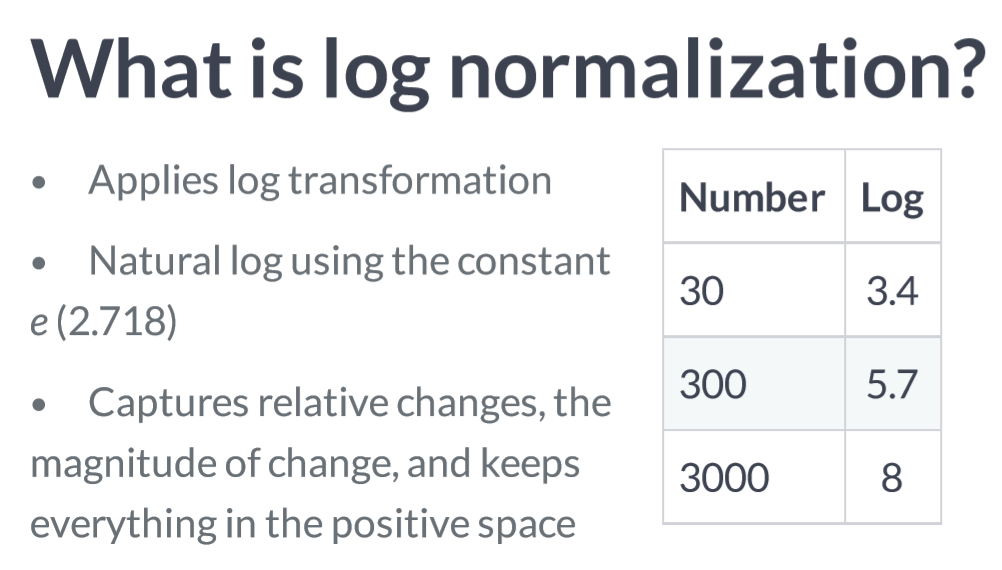

Let's take a copy of the DataFrame and apply the log normalization to the 'Proline' column and see if this will come up with a new difference

In [5]:
# take copy
wine_copy = wine.copy()
# Apply the log normalization function to the Proline column
wine_copy['Proline'] = np.log(wine_copy['Proline'])
# Check the variance of the Proline column again
wine_copy['Proline'].var()

0.17231366191842018

#### Square Root Normalization

In [6]:
# take copy
wine_copy_2 = wine.copy()
# Apply the log normalization function to the Proline column
wine_copy_2['Proline'] = np.sqrt(wine_copy_2['Proline'])
# Check the variance of the Proline column again
wine_copy_2['Proline'].var()


31.369422431942983

#### Standardization
The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula:

$Z$ = $\frac{X - \bar{X}}{S}$

In [7]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
# Create the scaler
ss = StandardScaler()
# create a copy of wine
wine_copy_3 = wine.copy()

# Scaled data 
wine_copy_3_scaled = ss.fit_transform(wine_copy_3)

#create a dataframe
wine_copy_3_scaled_df = pd.DataFrame(wine_copy_3_scaled, columns=wine_copy_3.columns)
# check with head
wine_copy_3_scaled_df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [8]:
# check values range 
wine_copy_3_scaled_df.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-9.056426e-16,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.213944e+00,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-1.213944e+00,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,7.996036e-02,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,1.373864e+00,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,1.373864e+00,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [9]:
# Trying to reach the same form using Pandas
# take a copy of dataframe
wine_copy_4 =  wine.copy()
# scaled 
wine_copy_4_scaled = (wine_copy_4 - wine_copy_4.mean())/ wine_copy_4.std()
# check wiht head
wine_copy_4_scaled.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-1.309814e-15,7.823954e-15,2.943962e-16,-4.082876e-15,-5.488743e-17,-7.609394e-17,1.234967e-16,9.580351e-16,-1.635396e-15,-1.666270e-15,-4.216353e-16,1.657850e-15,2.200487e-15,-1.341000e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.210529e+00,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318e+00,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00
25%,-1.210529e+00,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-8.829774e-01,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01
50%,7.973544e-02,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,9.568993e-02,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01
75%,1.370000e+00,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,8.067217e-01,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01
max,1.370000e+00,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372e+00,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00


In [10]:
# return the original values of 'Type'  for wine_copy_3_scaled_df
wine_copy_3_scaled_df['Type'] = wine['Type']
# check 
wine_copy_3_scaled_df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### MinMax Normalization
Min Max is a technique that helps to normalize the data. It will scale the data between 0 and 1

$X_{scaled}$ = $\frac{X - X_{min}}{X_{max} - X_{min}}$

In [11]:
# Import MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler
# Create the scaler
mms = MinMaxScaler()
# create a copy of wine
wine_copy_5 = wine.copy()

# Scaled data 
wine_copy_5_scaled = mms.fit_transform(wine_copy_5)

#create a dataframe
wine_copy_5_scaled_df = pd.DataFrame(wine_copy_5_scaled, columns=wine_copy_5.columns)
# check with head
wine_copy_5_scaled_df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [12]:
# check with describe
wine_copy_5_scaled_df.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.387517,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.500000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,1.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# we can do this with Pandas also
# take a copy of dataframe
wine_copy_6 =  wine.copy()
# scaled 
wine_copy_6_scaled = (wine_copy_6 - wine_copy_6.min())/ (wine_copy_6.max() - wine_copy_6.min())
# check with head
wine_copy_6_scaled.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.387517,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.500000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,1.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Sampling


In [20]:
volunteer = pd.read_csv('data/volunteer.csv')

In [31]:
# Now, we want a machine learning model that can predict the 'category_desc'
# Let's investegate more
volunteer["category_desc"].value_counts()

Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64

In [33]:
# Let's convert these values to percentages to see the distrbution of every class
volunteer["category_desc"].value_counts() * 100 / len(volunteer)

Strengthening Communities    46.165414
Helping Neighbors in Need    17.894737
Education                    13.834586
Health                        7.819549
Environment                   4.812030
Emergency Preparedness        2.255639
Name: category_desc, dtype: float64

As this is the real distrbution of the classes we want to maintain this distrbution in the training data and in the testing data as well and this is the meaning of Stratified Sampling another way of sampling is Random Sampling whichs means to take your sample of data randomly without caring about variables distrbutions.



X ,Y
X==>features 
Y==>labbel 

x_train ,x_test , y_train, y_test

train test split from sklearn

random sampling

all data 1000 (A-500 , B -400 , C-100 )==> test data 100
random_sampling(A-5 , B-3 , C-2)
stratified(A-5 , B-4 , c-1)


##### Random Sampling

In [ ]:
# train_test_split() :: method ---> used for splitting data into training and
# testing part and it has methods for stratifed sampling
# importing sklearn
from sklearn.model_selection import train_test_split

# Create a data with all columns except category_desc
volunteer_X = volunteer_subset.drop("category_desc", axis=1)

# Create a category_desc labels dataset
volunteer_y = volunteer_subset[["category_desc"]]

#split up the dataset volunteer_subset dataset
X_train_no_stratify, X_test_no_stratify, y_train_no_stratify, y_test_no_stratify = train_test_split(volunteer_X, volunteer_y, test_size = 0.2, random_state = 10)

# Print out the category_desc counts on the training y labels
y_train_no_stratify["category_desc"].value_counts() * 100 / len(y_train_no_stratify)

##### Stratified Sampling

In [ ]:
# Now, let's try using the concept of stratifed sampling

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(volunteer_X, volunteer_y, test_size = 0.2, random_state = 10, stratify = volunteer_y)

# Print out the category_desc counts on the training y labels
y_train_stratified["category_desc"].value_counts() * 100 / len(y_train_stratified)
# almost the same as the original dataset

#### Feature Engineering


Feature Engineering means to create new feature that was not exist in your data or may be transform your data from a shape to another all of this shall be done for the sake of our model performance. Feautre Engineering can vary according to each problem it may be simple in some cases and quit complicated in others.

In [15]:
# Let's create some data to play with 
import random 
random.seed(10)
# create a random dict for runners and their score in 5 runs
runtime_dict = { 
    'Lee' : [20 + 40 * random.random() for item in range(10)],
    'Sam' : [25 + 35 * random.random() for item in range(10)],
    'Adam': [30 + 55 * random.random() for item in range(10)],
    'Hossam': [27 + 38 * random.random() for item in range(10)],
    'John': [33 + 40 * random.random() for item in range(10)]
}
runtime = pd.DataFrame(runtime_dict).transpose()
run_columns = ['run_'+str(i) for i in range(10)]
runtime.columns = run_columns
# check
runtime.head()

,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9
Lee,42.856104,37.155562,43.123652,28.243929,52.532850,52.943555,46.138901,26.409182,40.826774,33.110912
Sam,33.749884,58.348592,59.879495,26.559473,55.105636,46.111671,38.356210,34.926638,48.623770,40.989090
Adam,67.722382,66.401548,37.313798,72.231080,84.032729,83.316349,63.732975,32.434335,30.223033,37.368489
Hossam,62.758086,38.508701,40.913533,61.131457,38.945825,47.861323,43.569176,29.469779,49.212757,59.074580
John,39.256757,41.971959,49.514808,34.476995,52.864140,65.719315,59.315638,54.339349,67.205030,38.987525


Having a look in this data may make you think about averaging the total runs scores. this may lead to a reduced number of features and this may be so helpful for some machine learing models

In [16]:
# Use apply to create a mean column
runtime["mean"] = runtime.apply(lambda row : row[run_columns].mean(), axis=1)
# check the new column
runtime.head()

,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,mean
Lee,42.856104,37.155562,43.123652,28.243929,52.532850,52.943555,46.138901,26.409182,40.826774,33.110912,40.334142
Sam,33.749884,58.348592,59.879495,26.559473,55.105636,46.111671,38.356210,34.926638,48.623770,40.989090,44.265046
Adam,67.722382,66.401548,37.313798,72.231080,84.032729,83.316349,63.732975,32.434335,30.223033,37.368489,57.477672
Hossam,62.758086,38.508701,40.913533,61.131457,38.945825,47.861323,43.569176,29.469779,49.212757,59.074580,47.144522
John,39.256757,41.971959,49.514808,34.476995,52.864140,65.719315,59.315638,54.339349,67.205030,38.987525,50.365152


Another helpful method is extracting the month or day from a given dates because in some cases we only care about some event that may be repeated every month or in specific months

In [22]:
# let's get back to volunteer data set and make sure it contains some dates
volunteer.head()

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5022,37237,500,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,Strengthening Communities,...,March 31 2012,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5055,37425,15,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,Environment,...,February 05 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# using info to check datatypes
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

In [24]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer['start_date_converted'].apply(lambda row: row.month)

# Take a look at the converted and new month columns
volunteer[['start_date_converted', 'start_date_month']].head()

,start_date_converted,start_date_month
0,2011-07-30,7
1,2011-02-01,2
2,2011-01-29,1
3,2011-02-14,2
4,2011-02-05,2


Another form of feature engineering is to extract some useful information from text. that's mean the entire text may not by useful sometimes unless we succeeded to grab a useful part of it.

In [27]:
# Let's explore another dataset that may have some text data
hiking = pd.read_json('data/hiking.json')
# head
hiking.head()
# the column length has the word mile or miles attached to the actual length so, extracting only numeric values from
# this column has a graet effect

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


In [28]:
# let's define a function that'd take care of this cleaning step
def return_mileage(length):
    # Make sure that the input is string
    length = str(length)
    # import regular expression package
    import re
    # extract all subsets in length that matches the regex
    extract = re.findall("\d+\.\d+", length)
    # return the first one if there was result
    if len(extract) != 0:
        return float(extract[0]) 
    else:
        return 0.0

In [29]:
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(lambda row: return_mileage(row))
# Check the result
hiking[["Length", "Length_num"]].head()

,Length,Length_num
0,0.8 miles,0.80
1,1.0 mile,1.00
2,0.75 miles,0.75
3,0.5 miles,0.50
4,0.5 miles,0.50
